# CS983: Embedded, Cyber Physical Systems and IoT Security


## Task 2
Given the short duration of the project, we have collected a dataset that consists of humidity and temperature values along with the time stamps. You have access to a dataset containing temperature and humidity values, each associated with timestamps. Your objective is to categorize each day based on predefined criteria:

● Hot (temperature > 30°C and humidity ≤ 70%)

● Hot and Humid (temperature > 30°C and humidity > 70%)

● Cold (temperature ≤ 30°C and humidity > 30%)

● Cold and dry (temperature ≤ 30°C and humidity ≤ 30%).

Your task involves accurately classifying a given date according to these predefined categories
and their respective thresholds.
You also have to examine the dataset using graphs or plots to analyze the changes in weather
patterns over the years.

Dataset: https://drive.google.com/file/d/1wtGzFLtIW80mAPi-Pij8MQJN3Me6823v/view

# Table of Contents

1. [Import Libraries](#Import-Libraries)
2. [Load Dataset](#Load-Dataset)
3. [Data Aggregation](#Data-Aggregation)
4. [Data Labeling](#Data-Labeling)
5. [Data Visualization](#Data-Visualization)
6. [Machine Learning](#Machine-Learning)
7. [Evaluation](#Evaluation)
8. [Conclusion](#Conclusion)

## Import Libraries
<a id="Import-Libraries"></a>

In [1]:
# 1. Import Required Libraries
# ----------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Load Dataset
<a id="Load-Dataset"></a>

In [2]:
# ======================================================================
# 2. Load and Inspect the Dataset
# ----------------------------------------------------------------------
df = pd.read_csv("Temp_and_humidity_dataset.csv")

print("Initial dataset shape:", df.shape)
df.info()
print("First few rows:")
display(df.head())

Initial dataset shape: (52608, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52608 entries, 0 to 52607
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATETIME     52608 non-null  object 
 1   TEMPERATURE  52608 non-null  float64
 2   HUMIDITY     52608 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.2+ MB
First few rows:


,DATETIME,TEMPERATURE,HUMIDITY
0,2015-01-01 00:00:00,19.0,75.0
1,2015-01-01 01:00:00,19.0,77.0
2,2015-01-01 02:00:00,19.0,78.0
3,2015-01-01 03:00:00,19.0,80.0
4,2015-01-01 04:00:00,19.0,81.0


In [3]:
# ======================================================================
# Pandas Profiling
# ----------------------------------------------------------------------
from ydata_profiling import ProfileReport
profile = ProfileReport(df, explorative=True)  # explorative=True includes more analysis
profile.to_notebook_iframe()  # Displays the report within Jupyter Notebook

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Aggregation
<a id="Data-Aggregation"></a>

In [4]:
# Convert DATETIME to datetime format
df['DATETIME'] = pd.to_datetime(df['DATETIME'], errors='coerce')

# Drop rows where DATETIME failed to parse or if T/H are missing
df.dropna(subset=['DATETIME', 'TEMPERATURE', 'HUMIDITY'], inplace=True)

In [5]:
# ======================================================================
# 3. Daily Aggregation
# ----------------------------------------------------------------------
# Extract 'Date' from the Timestamp
df['Date'] = df['DATETIME'].dt.date

# Group by Date as there are multiple readings per day:
daily_df = df.groupby('Date', as_index=False).agg({
    'TEMPERATURE': 'mean',
    'HUMIDITY': 'mean'
})

print("\nAfter grouping by Date:")
print("Daily dataset shape:", daily_df.shape)
display(daily_df.head())


After grouping by Date:
Daily dataset shape: (2192, 3)


,Date,TEMPERATURE,HUMIDITY
0,2015-01-01,20.333333,83.208333
1,2015-01-02,23.041667,76.250000
2,2015-01-03,24.375000,76.750000
3,2015-01-04,23.916667,68.250000
4,2015-01-05,21.250000,51.375000


## Data Labeling
<a id="Data-Labeling"></a>

In [6]:
# ======================================================================
# 4. Threshold-Based Classification to Create Labels
# ----------------------------------------------------------------------
# Categories (from assignment):
# 1) Hot (temp > 30 & humidity <= 70)
# 2) Hot and Humid (temp > 30 & humidity > 70)
# 3) Cold (temp <= 30 & humidity > 30)
# 4) Cold and Dry (temp <= 30 & humidity <= 30)

def classify_day(temp, hum):
    if temp > 30 and hum <= 70:
        return "Hot"
    elif temp > 30 and hum > 70:
        return "Hot and Humid"
    elif temp <= 30 and hum > 30:
        return "Cold"
    elif temp <= 30 and hum <= 30:
        return "Cold and Dry"
    else:
        return "Unclassified"

daily_df['Category'] = daily_df.apply(
    lambda row: classify_day(row['TEMPERATURE'], row['HUMIDITY']),
    axis=1
)

# Check the distribution of categories
print("\nCategory Distribution:")
print(daily_df['Category'].value_counts())


Category Distribution:
Category
Cold             1306
Hot               646
Hot and Humid     213
Cold and Dry       27
Name: count, dtype: int64


## Data Visualization
<a id="Data-Visualization"></a>

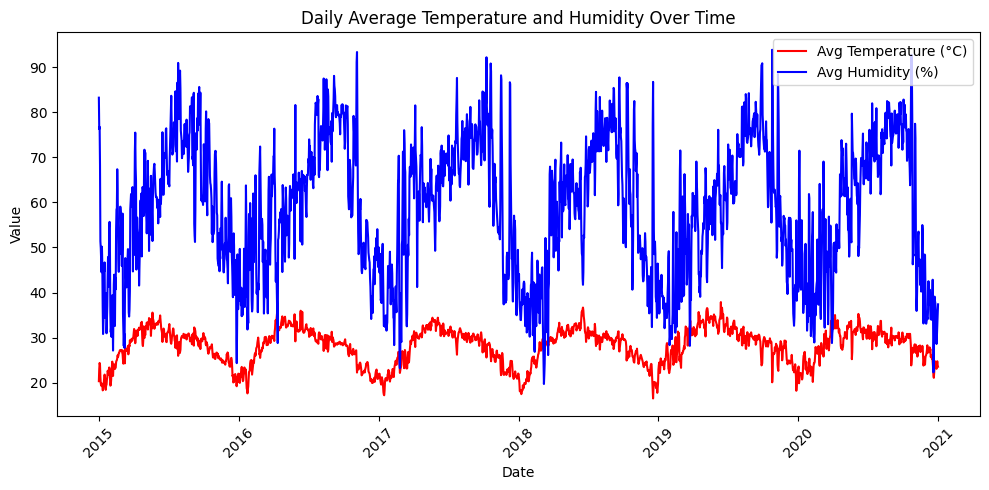

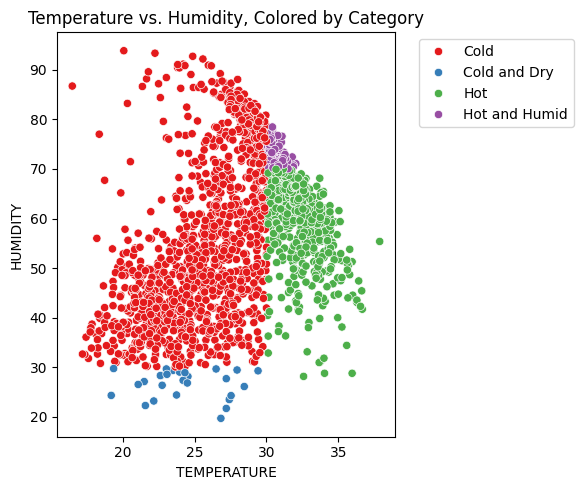

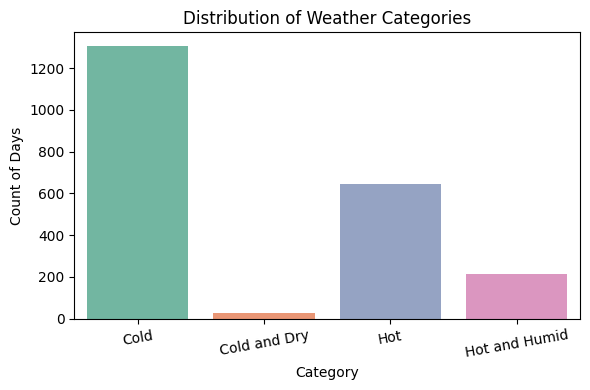

In [7]:
# ======================================================================
# 5. Exploratory Data Visualizations
# ----------------------------------------------------------------------

# 5.1 Line Plot of Temperature and Humidity Over Time
plt.figure(figsize=(10, 5))
plt.plot(daily_df['Date'], daily_df['TEMPERATURE'], label='Avg Temperature (°C)', color='red')
plt.plot(daily_df['Date'], daily_df['HUMIDITY'], label='Avg Humidity (%)', color='blue')
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Daily Average Temperature and Humidity Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 5.2 Scatter Plot: Temperature vs. Humidity, colored by Category
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=daily_df,
    x='TEMPERATURE',
    y='HUMIDITY',
    hue='Category',
    palette='Set1'
)
plt.title("Temperature vs. Humidity, Colored by Category")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 5.3 Bar Plot: Distribution of Categories
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=daily_df, palette='Set2')
plt.title("Distribution of Weather Categories")
plt.xlabel("Category")
plt.ylabel("Count of Days")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

Note:
Temperature and Humidity Over Time
This plot shows day-to-day fluctuations in temperature and humidity, making it easy to spot overall trends and seasonal variations.

Temperature vs. Humidity, Colored by Category)=
Here we see how each day’s temperature and humidity pair up, with distinct clusters for each category (Hot, Hot & Humid, Cold, Cold & Dry).

Distribution of Weather Categories:
This bar chart visualizes how many days fall into each category, highlighting the imbalance where some categories are rarer than others.

## Machine Learning
<a id="machine-learning"></a>

In [8]:
# ======================================================================
# 6. Prepare Data for Machine Learning
#    We'll treat 'Temperature' and 'Humidity' as features,
#    and 'Category' as the target label (encoded).
# ----------------------------------------------------------------------
X = daily_df[['TEMPERATURE', 'HUMIDITY']].copy()
y = daily_df['Category'].copy()

# Encode the string labels into numeric values
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # e.g., "Cold" -> 0, "Cold and Dry" -> 1, etc.

In [9]:
# ======================================================================
# 7. Split Into Training & Test Sets
# ----------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42
)

print(f"\nShapes:")
print("X_train:", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train:", y_train.shape)
print("y_test: ", y_test.shape)


Shapes:
X_train: (1534, 2)
X_test:  (658, 2)
y_train: (1534,)
y_test:  (658,)


In [10]:
# ------------------------------------------------------------------------
# 8. Define multiple models
# ------------------------------------------------------------------------
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

# ------------------------------------------------------------------------
# 7. Fit models & gather them in a list
# ------------------------------------------------------------------------
trained_models = {}
for model_name, model_obj in models.items():
    model_obj.fit(X_train, y_train)
    trained_models[model_name] = model_obj

## Evaluation
<a id="Evaluataion"></a>

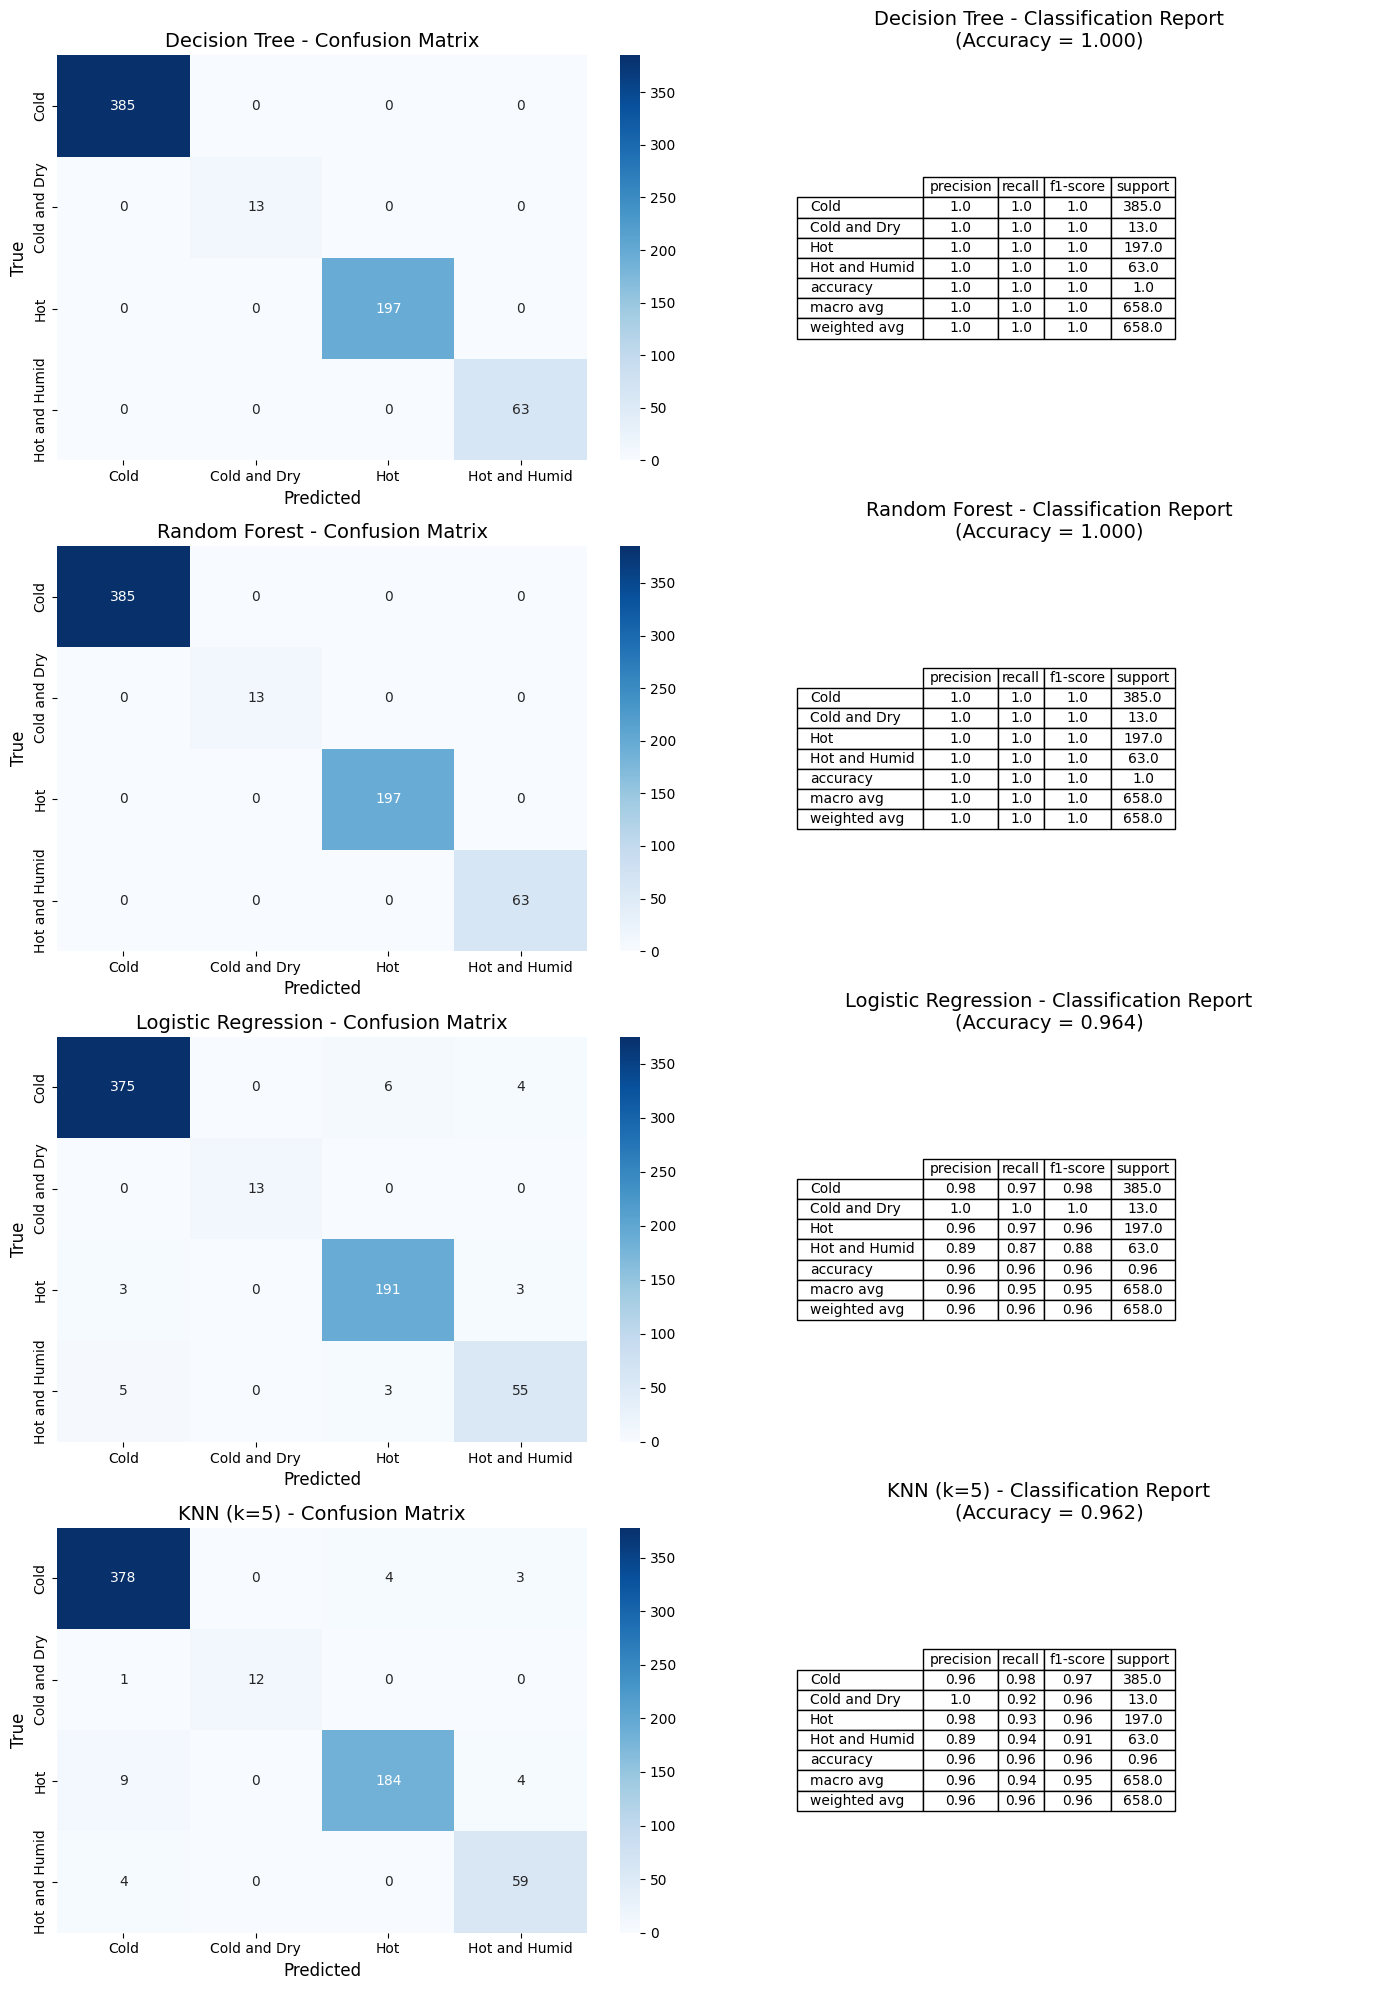

In [11]:
# ------------------------------------------------------------------------
# 9. Plot Confusion Matrix & Classification Report
# ------------------------------------------------------------------------
class_names = le.classes_
model_list = list(trained_models.items())  # (model_name, model_obj)
n_models = len(model_list)

fig, axes = plt.subplots(n_models, 2, figsize=(14, 5 * n_models))

for i, (model_name, model_obj) in enumerate(model_list):
    # Handle subplots as there are multiple models
    if n_models == 1:
        ax_cm = axes[0]
        ax_table = axes[1]
    else:
        ax_cm = axes[i, 0]
        ax_table = axes[i, 1]
    
    # Predict on the test set
    y_pred = model_obj.predict(X_test)
    
    # (a) Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        cmap='Blues',
        fmt='d',
        ax=ax_cm,
        xticklabels=class_names,
        yticklabels=class_names
    )
    ax_cm.set_title(f"{model_name} - Confusion Matrix", fontsize=14)
    ax_cm.set_xlabel("Predicted", fontsize=12)
    ax_cm.set_ylabel("True", fontsize=12)
    
    # (b) Classification Report 
    report_dict = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    
    # Accuracy 
    acc_val = accuracy_score(y_test, y_pred)
    
    # Show classification report as a table
    ax_table.axis('tight')
    ax_table.axis('off')
    table = ax_table.table(
        cellText=np.round(report_df.values, 2),
        rowLabels=report_df.index,
        colLabels=report_df.columns,
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(report_df.columns))))
    
    ax_table.set_title(
        f"{model_name} - Classification Report\n(Accuracy = {acc_val:.3f})", 
        fontsize=14
    )

plt.tight_layout()
plt.show()


In [19]:
# ==============================================================================
# 10. [Enhancements] Cross-Validation
# ==============================================================================
print("\n================== [Enhancements] CROSS-VALIDATION ==================")
from sklearn.model_selection import cross_val_score

for model_name, model_obj in trained_models.items():
    # 5-fold cross validation
    cv_scores = cross_val_score(model_obj, X, y_encoded, cv=5)
    print(f"{model_name} - CV Accuracy (5-fold): {cv_scores}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.3f}")
    print("-----------------------------------------------------")

# ==============================================================================
# 8. [Enhancements] Class Balancing Approaches
# ==============================================================================
print("\n================== [Enhancements] CLASS BALANCING ==================")

# Using 'class_weight="balanced"' in a Decision Tree
dt_balanced = DecisionTreeClassifier(
    random_state=42,
    class_weight="balanced"
)
dt_balanced.fit(X_train, y_train)
y_pred_bal = dt_balanced.predict(X_test)
acc_bal = accuracy_score(y_test, y_pred_bal)

print(f"Decision Tree (class_weight='balanced') Accuracy: {acc_bal:.3f}")

# Using SMOTE Oversampling
# -----------------------------------

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    
dt_sm = DecisionTreeClassifier(random_state=42)
dt_sm.fit(X_train_sm, y_train_sm)
y_pred_sm = dt_sm.predict(X_test)
acc_sm = accuracy_score(y_test, y_pred_sm)
print(f"Decision Tree (with SMOTE) Accuracy: {acc_sm:.3f}")


================== [Enhancements] CROSS-VALIDATION ==================
Decision Tree - CV Accuracy (5-fold): [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.000
-----------------------------------------------------
Random Forest - CV Accuracy (5-fold): [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.000
-----------------------------------------------------
Logistic Regression - CV Accuracy (5-fold): [0.96810934 0.96583144 0.96575342 0.95890411 0.97945205]
Mean CV Accuracy: 0.968
-----------------------------------------------------
KNN (k=5) - CV Accuracy (5-fold): [0.96583144 0.98177677 0.97488584 0.95890411 0.97031963]
Mean CV Accuracy: 0.970
-----------------------------------------------------

================== [Enhancements] CLASS BALANCING ==================
Decision Tree (class_weight='balanced') Accuracy: 1.000
Decision Tree (with SMOTE) Accuracy: 1.000


## Conclusion
<a id="Conclusion"></a>
We started by labeling each day as Hot, Hot & Humid, Cold, or Cold & Dry, using simple temperature and humidity thresholds. Then, we trained several machine learning models—Decision Tree, Random Forest, Logistic Regression, and KNN—to predict these labels. The Decision Tree and Random Forest got almost perfect scores, and both Logistic Regression and KNN were also very accurate. We double-checked our work by using cross-validation, which confirmed the models were not just memorizing the data. We also looked at the effect of class imbalance (since some labels had fewer samples) and tested methods like SMOTE and class weighting, but they didn’t change much here because the dataset was already easy to separate. Overall, we successfully classified the data with ML models, and we verified the results. We further attempted with cross-validation and class balancing methods to see if our performance increases and noted a marginal increase.